COVID19- TIME SERIES DATA- ANALYSIS

The main source of data for this analysis of ongoing COVID19 pandemic is the dataset prepared by John Hopkins UNiversity(JHU).
The time-series data in particular can be found here https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

In [1]:
#import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from plotly.offline import iplot, init_notebook_mode
from scipy import stats
from datetime import datetime 
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
%matplotlib inline

In [2]:
#Import time series data for confirmed cases

COVID_CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

covid_confirmed = pd.read_csv(COVID_CONFIRMED_URL)

print(covid_confirmed.shape)

covid_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)

covid_confirmed.head()


(267, 273)


,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,39548,39616,39693,39703,39799,39870,39928,39994,40026,40073
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,14730,14899,15066,15231,15399,15570,15752,15955,16212,16501
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,52520,52658,52804,52940,53072,53325,53399,53584,53777,53998
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,2568,2568,2696,2696,2696,2995,2995,3190,3190,3377
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,5725,5958,6031,6246,6366,6488,6680,6846,7096,7222


In [3]:
covid_confirmed.columns

Index(['Province/State', 'Country', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '10/7/20', '10/8/20', '10/9/20', '10/10/20', '10/11/20', '10/12/20',
       '10/13/20', '10/14/20', '10/15/20', '10/16/20'],
      dtype='object', length=273)

In [4]:
#Import time series data for death cases

COVID_DEATHS_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

covid_deaths = pd.read_csv(COVID_DEATHS_URL)

print(covid_confirmed.shape)

covid_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

covid_deaths.head()

(267, 273)


,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1469,1470,1472,1473,1477,1479,1480,1481,1481,1485
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,407,411,413,416,420,424,429,434,439,443
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1771,1783,1789,1795,1801,1809,1818,1827,1827,1841
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,54,55,55,55,57,57,59,59,59
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,211,208,212,218,218,219,222,227,228,234


In [5]:
COVID_RECOVERED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

covid_recovered = pd.read_csv(COVID_RECOVERED_URL)

print(covid_recovered.shape)

covid_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)

covid_recovered.head()

(254, 273)


,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,33045,33058,33058,33064,33114,33118,33308,33354,33447,33516
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9115,9215,9304,9406,9500,9585,9675,9762,9864,9957
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,36857,36958,37067,37170,37170,37382,37492,37603,37603,37856
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1715,1715,1814,1814,1814,1928,1928,2011,2011,2057
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2598,2635,2685,2716,2743,2744,2761,2801,2928,3012


In [6]:
#Dropping lat and long - unused columns , Filling spaces for null values of Province/State column

covid_confirmed[['Province/State']] = covid_confirmed[['Province/State']].fillna('')
covid_confirmed.fillna(0, inplace=True)

-----------------------------------------------COVID-INDIA-SWEDEN-ANALYSIS-----------------------------------------------------

In [7]:
#TIME-SERIES PLOT OF THE 4 COUNTRIES IN SCOPE 
#get columns corresponding to 6 weeks starting from 8/30/20 till date

#extract the dates needed
data = list(covid_confirmed.columns[0:2]) + list(covid_confirmed.columns[-46:])

#we're interested in these countries, so including only those 4. Netherlands Carribean is filtered out.
countries = ['India','Netherlands','Sweden','Malaysia']
covid_filtered = covid_confirmed.loc[(covid_confirmed['Country'].isin(countries)), data]
covid_filtered = covid_filtered[(covid_filtered['Province/State'] == '')]
covid_filtered

,Province/State,Country,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,...,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20
143,,India,3769523,3853406,3936747,4023179,4113811,4204613,4280422,4370128,...,6835655,6906151,6979423,7053806,7120538,7175880,7239389,7307097,7370468,7432680
171,,Malaysia,9354,9360,9374,9385,9391,9397,9459,9559,...,13993,14368,14722,15096,15657,16220,16880,17540,18129,18758
190,,Netherlands,71129,71863,72464,73208,73862,74787,75584,76548,...,149988,155810,161781,168280,174653,181498,188876,196163,203954,211938
231,,Sweden,84521,84532,84729,84985,84985,84985,85558,85707,...,96677,97532,98451,98451,98451,98451,100654,101332,102407,103200


In [8]:
#Time series plot of confirmed cases for 4 selected countries 
covid_filtered = covid_filtered.groupby(['Country']).sum()
covid_filtered.transpose().iplot(title = 'Time series of confirmed cases of countries')

In [9]:
#get columns corresponding to 6 weeks starting from 8/30/20 till date 
#Pulling the dataset with same conditions as that of the previous one.(for confirmed cases)

covid_deaths[['Province/State']] = covid_deaths[['Province/State']].fillna('')
covid_deaths.fillna(0, inplace=True)

data = list(covid_deaths.columns[0:2]) + list(covid_deaths.columns[-46:])
countries = ['India','Netherlands','Sweden','Malaysia']
covid_filtered1 = covid_deaths.loc[(covid_deaths['Country'].isin(countries)), data]
covid_filtered1 = covid_filtered1[(covid_filtered1['Province/State'] == '')]
covid_filtered1

,Province/State,Country,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,...,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20
143,,India,66333,67376,68472,69561,70626,71642,72775,73890,...,105526,106490,107416,108334,109150,109856,110586,111266,112161,112998
171,,Malaysia,128,128,128,128,128,128,128,128,...,141,146,152,155,157,159,163,167,170,176
190,,Netherlands,6230,6235,6235,6237,6241,6243,6243,6244,...,6518,6531,6544,6567,6584,6596,6631,6663,6692,6708
231,,Sweden,5813,5820,5832,5835,5835,5835,5837,5838,...,5892,5892,5894,5894,5894,5894,5899,5907,5910,5918


In [10]:
#Time series plot of mortality cases for 4 selected countries 
covid_filtered1 = covid_filtered1.groupby(['Country']).sum()

#get countries with most cases on last date in dataframe
covid_filtered1 = covid_filtered1.sort_values(by = covid_filtered1.columns[-1], ascending = False).head(4)

covid_filtered1.transpose().iplot(title = 'Time series of mortality cases of countries ')

As per the data , which is corresponding to September till date it can be seen that Malaysia has a very low mortality rate .
While though India being the highest in the no.of confirmed cases (nearly 80 million) reported so far , the death percentage seems low in proportion to the huge number of cases.  The population and population density are also two major factors contributing to the rapid increase in India.

In [11]:
#Converting the data into long format for ease of analysis and further interpretation.

dates = covid_confirmed.columns[4:]

covid_confirmed_long = covid_confirmed.melt(
    id_vars=['Province/State', 'Country', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='date', 
    value_name='Confirmed'
)
covid_deaths_long = covid_deaths.melt(
    id_vars=['Province/State', 'Country', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='date', 
    value_name='Deaths'
)
covid_recovered_long = covid_recovered.melt(
    id_vars=['Province/State', 'Country', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='date', 
    value_name='Recovered'
)

In [12]:
covid_recovered_long = covid_recovered_long[covid_recovered_long['Country']!='Canada']

In [13]:
# Merging all the long formatted files into one dataframe : merged_table

merged_table = covid_confirmed_long.merge(
  right=covid_deaths_long, 
  how='left',
  on=['Province/State', 'Country', 'date', 'Lat','Long']
)
# Merging full_table and recovered_df_long
merged_table = merged_table.merge(
  right=covid_recovered_long, 
  how='left',
  on=['Province/State', 'Country','date','Lat','Long']
)

merged_table

,Province/State,Country,Lat,Long,date,Confirmed,Deaths,Recovered
0,,Afghanistan,33.939110,67.709953,1/22/20,0,0.0,NaN
1,,Albania,41.153300,20.168300,1/22/20,0,0.0,NaN
2,,Algeria,28.033900,1.659600,1/22/20,0,0.0,NaN
3,,Andorra,42.506300,1.521800,1/22/20,0,0.0,NaN
4,,Angola,-11.202700,17.873900,1/22/20,0,0.0,NaN
...,...,...,...,...,...,...,...,...
71818,,West Bank and Gaza,31.952200,35.233200,10/16/20,46434,402.0,NaN
71819,,Western Sahara,24.215500,-12.885800,10/16/20,10,1.0,NaN
71820,,Yemen,15.552727,48.516388,10/16/20,2055,NaN,NaN
71821,,Zambia,-13.133897,27.849332,10/16/20,15659,346.0,NaN


In [14]:
#Extract cases in cruises and eliminate them as they are out of scope of this analysis.
ship_rows = merged_table['Province/State'].str.contains('Grand Princess') | merged_table['Province/State'].str.contains('Diamond Princess') | merged_table['Country'].str.contains('Diamond Princess') | merged_table['Country'].str.contains('MS Zaandam')
ship_data = merged_table[ship_rows]
merged_table = merged_table[~(ship_rows)]
merged_table

,Province/State,Country,Lat,Long,date,Confirmed,Deaths,Recovered
0,,Afghanistan,33.939110,67.709953,1/22/20,0,0.0,NaN
1,,Albania,41.153300,20.168300,1/22/20,0,0.0,NaN
2,,Algeria,28.033900,1.659600,1/22/20,0,0.0,NaN
3,,Andorra,42.506300,1.521800,1/22/20,0,0.0,NaN
4,,Angola,-11.202700,17.873900,1/22/20,0,0.0,NaN
...,...,...,...,...,...,...,...,...
71818,,West Bank and Gaza,31.952200,35.233200,10/16/20,46434,402.0,NaN
71819,,Western Sahara,24.215500,-12.885800,10/16/20,10,1.0,NaN
71820,,Yemen,15.552727,48.516388,10/16/20,2055,NaN,NaN
71821,,Zambia,-13.133897,27.849332,10/16/20,15659,346.0,NaN


In [15]:
#Replace missing values with zeroes.
merged_table['Deaths'] = merged_table['Deaths'].fillna(0)
merged_table['Recovered'] = merged_table['Recovered'].fillna(0)

In [16]:
# Active Case = confirmed - deaths - recovered
merged_table['Active'] = merged_table['Confirmed'] - merged_table['Deaths'] - merged_table['Recovered']
merged_table

,Province/State,Country,Lat,Long,date,Confirmed,Deaths,Recovered,Active
0,,Afghanistan,33.939110,67.709953,1/22/20,0,0.0,0.0,0.0
1,,Albania,41.153300,20.168300,1/22/20,0,0.0,0.0,0.0
2,,Algeria,28.033900,1.659600,1/22/20,0,0.0,0.0,0.0
3,,Andorra,42.506300,1.521800,1/22/20,0,0.0,0.0,0.0
4,,Angola,-11.202700,17.873900,1/22/20,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
71818,,West Bank and Gaza,31.952200,35.233200,10/16/20,46434,402.0,0.0,46032.0
71819,,Western Sahara,24.215500,-12.885800,10/16/20,10,1.0,0.0,9.0
71820,,Yemen,15.552727,48.516388,10/16/20,2055,0.0,0.0,2055.0
71821,,Zambia,-13.133897,27.849332,10/16/20,15659,346.0,0.0,15313.0


In [17]:
#get the total number of active , confirmed , deaths and recovered cases .
final_data = merged_table.groupby(['date', 'Country'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
final_data

c:\users\gurur\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,Country,Confirmed,Deaths,Recovered,Active
0,1/22/20,Afghanistan,0,0.0,0.0,0.0
1,1/22/20,Albania,0,0.0,0.0,0.0
2,1/22/20,Algeria,0,0.0,0.0,0.0
3,1/22/20,Andorra,0,0.0,0.0,0.0
4,1/22/20,Angola,0,0.0,0.0,0.0
...,...,...,...,...,...,...
50298,9/9/20,West Bank and Gaza,27919,192.0,0.0,27727.0
50299,9/9/20,Western Sahara,10,1.0,0.0,9.0
50300,9/9/20,Yemen,1999,0.0,0.0,1999.0
50301,9/9/20,Zambia,13112,300.0,0.0,12812.0


In [18]:
# new cases 
temp = final_data.groupby(['Country', 'date', ])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()

mask = temp['Country'] != temp['Country'].shift(1)
temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan

# renaming columns
temp.columns = ['Country', 'date', 'New cases', 'New deaths', 'New recovered']

# merging new values
final_data = pd.merge(final_data, temp, on=['Country', 'date'])

# filling na with 0
final_data = final_data.fillna(0)

# fixing data types
cols = ['New cases', 'New deaths', 'New recovered']
final_data[cols] = final_data[cols].astype('int')
# 
final_data['New cases'] = final_data['New cases'].apply(lambda x: 0 if x<0 else x)
final_data['New deaths'] = final_data['New deaths'].apply(lambda x: 0 if x<0 else x)
final_data

c:\users\gurur\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,1/22/20,Afghanistan,0,0.0,0.0,0.0,0,0,0
1,1/22/20,Albania,0,0.0,0.0,0.0,0,0,0
2,1/22/20,Algeria,0,0.0,0.0,0.0,0,0,0
3,1/22/20,Andorra,0,0.0,0.0,0.0,0,0,0
4,1/22/20,Angola,0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
50298,9/9/20,West Bank and Gaza,27919,192.0,0.0,27727.0,556,2,0
50299,9/9/20,Western Sahara,10,1.0,0.0,9.0,0,0,0
50300,9/9/20,Yemen,1999,0.0,0.0,1999.0,5,0,0
50301,9/9/20,Zambia,13112,300.0,0.0,12812.0,160,3,0


In [19]:
#Import demographic info csv file of countries
countries = pd.read_csv('../data/population_by_country_2020.csv')
countries.rename(columns={'Country (or dependency)':'Country' , 'Population (2020)':'Population','Density (P/Km²)':'Density(P/Km²)'}, inplace=True)

#Country name replaced to avoid mismatch while merging the files
final_data['Country'] = final_data['Country'].replace(['Korea, South'], 'South Korea')

countries_date_df = countries.groupby(['Country'],sort=False).sum().reset_index()
#countries_date_df.head()

In [20]:
#Filtering only necessary column from countries file into df1 dataframe
df1 = countries_date_df[['Country', 'Population','Density(P/Km²)']]
df1

,Country,Population,Density(P/Km²)
0,China,1440297825,153
1,India,1382345085,464
2,United States,331341050,36
3,Indonesia,274021604,151
4,Pakistan,221612785,287
...,...,...,...
230,Montserrat,4993,50
231,Falkland Islands,3497,0
232,Niue,1628,6
233,Tokelau,1360,136


In [21]:
#merge population file along with time series data to normalize the figures per million 

final_data = final_data.merge(df1 , on='Country')

#drop countries which are not in timeseries file 
final_data = final_data.dropna()
final_data

,date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Population,Density(P/Km²)
0,1/22/20,Afghanistan,0,0.0,0.0,0.0,0,0,0,39074280,60
1,1/23/20,Afghanistan,0,0.0,0.0,0.0,0,0,0,39074280,60
2,1/24/20,Afghanistan,0,0.0,0.0,0.0,0,0,0,39074280,60
3,1/25/20,Afghanistan,0,0.0,0.0,0.0,0,0,0,39074280,60
4,1/26/20,Afghanistan,0,0.0,0.0,0.0,0,0,0,39074280,60
...,...,...,...,...,...,...,...,...,...,...,...
47070,9/5/20,Zimbabwe,6837,206.0,0.0,6631.0,0,0,0,14899771,38
47071,9/6/20,Zimbabwe,6837,206.0,0.0,6631.0,0,0,0,14899771,38
47072,9/7/20,Zimbabwe,7298,210.0,0.0,7088.0,461,4,0,14899771,38
47073,9/8/20,Zimbabwe,7388,218.0,0.0,7170.0,90,8,0,14899771,38


In [22]:
final_data['Population_million'] = round((final_data['Population']/1000),2)
final_data['Cases_per_Million'] = round((final_data['Confirmed']/final_data['Population_million']),2)
final_data['Deaths_per_Million'] = round((final_data['Deaths']/final_data['Population_million']),2)
final_data['Recovered_per_Million'] = round((final_data['Recovered']/final_data['Population_million']),2)
final_data

,date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Population,Density(P/Km²),Population_million,Cases_per_Million,Deaths_per_Million,Recovered_per_Million
0,1/22/20,Afghanistan,0,0.0,0.0,0.0,0,0,0,39074280,60,39074.28,0.00,0.00,0.0
1,1/23/20,Afghanistan,0,0.0,0.0,0.0,0,0,0,39074280,60,39074.28,0.00,0.00,0.0
2,1/24/20,Afghanistan,0,0.0,0.0,0.0,0,0,0,39074280,60,39074.28,0.00,0.00,0.0
3,1/25/20,Afghanistan,0,0.0,0.0,0.0,0,0,0,39074280,60,39074.28,0.00,0.00,0.0
4,1/26/20,Afghanistan,0,0.0,0.0,0.0,0,0,0,39074280,60,39074.28,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47070,9/5/20,Zimbabwe,6837,206.0,0.0,6631.0,0,0,0,14899771,38,14899.77,0.46,0.01,0.0
47071,9/6/20,Zimbabwe,6837,206.0,0.0,6631.0,0,0,0,14899771,38,14899.77,0.46,0.01,0.0
47072,9/7/20,Zimbabwe,7298,210.0,0.0,7088.0,461,4,0,14899771,38,14899.77,0.49,0.01,0.0
47073,9/8/20,Zimbabwe,7388,218.0,0.0,7170.0,90,8,0,14899771,38,14899.77,0.50,0.01,0.0


In [23]:
#Was Sweden's voluntary lockdown strategy a success ?
#Sweden was one of the countries not to impose a compulsory lockdown when the rest of the Europe and world were under lockdown during Mar-May.
#They had an unsual strategy for tackling the outbreak which is hailed both as a success and condemned as a failure.

#filter for the chosen countries for the month of June 
countries = ['India','Netherlands','Sweden','Malaysia']
covid_countries = final_data[final_data.Country.isin(countries)]

covid_countries['date'] = pd.to_datetime(covid_countries['date'])
start_date = '2020-06-01'
end_date = '2020-06-30'
mask = (covid_countries['date'] >= start_date) & (covid_countries['date'] <= end_date)
covid_countries = covid_countries.loc[mask]

covid_countries_sorted = covid_countries.sort_values(['date'])
covid_countries_sorted

,date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Population,Density(P/Km²),Population_million,Cases_per_Million,Deaths_per_Million,Recovered_per_Million
19784,2020-06-01,India,198370,5608.0,0.0,192762.0,135562,3507,0,1382345085,464,1382345.08,0.14,0.00,0.00
26778,2020-06-01,Malaysia,7857,0.0,0.0,7857.0,1268,0,0,32436963,99,32436.96,0.24,0.00,0.00
30813,2020-06-01,Netherlands,46749,5981.0,179.0,40589.0,4168,540,30,17141544,508,17141.54,2.73,0.35,0.01
41035,2020-06-01,Sweden,39309,4710.0,0.0,34599.0,12741,1096,0,10110233,25,10110.23,3.89,0.47,0.00
19795,2020-06-02,India,207191,5829.0,0.0,201362.0,0,0,0,1382345085,464,1382345.08,0.15,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26799,2020-06-29,Malaysia,8637,0.0,0.0,8637.0,3,0,0,32436963,99,32436.96,0.27,0.00,0.00
41058,2020-06-30,Sweden,67924,5515.0,0.0,62409.0,26668,734,0,10110233,25,10110.23,6.72,0.55,0.00
19807,2020-06-30,India,585481,17400.0,0.0,568081.0,368657,11312,0,1382345085,464,1382345.08,0.42,0.01,0.00
26801,2020-06-30,Malaysia,8639,0.0,0.0,8639.0,669,0,0,32436963,99,32436.96,0.27,0.00,0.00


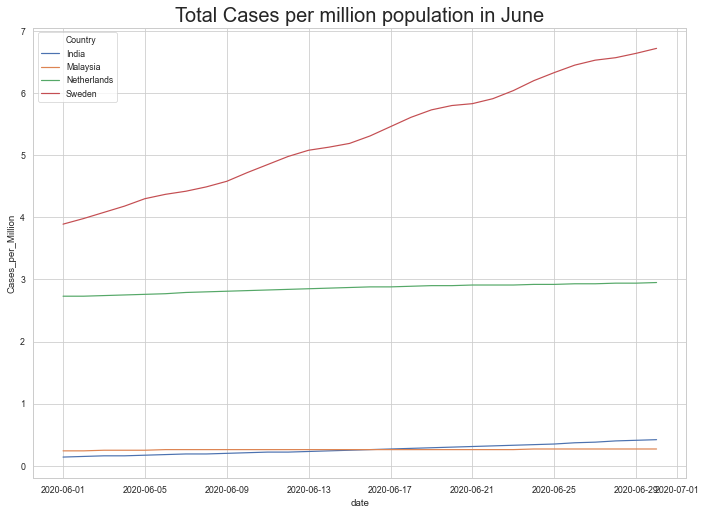

In [24]:
#plotting style specs
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style = 'whitegrid',context = 'paper')

from datetime import date
covid_countries_sorted.pivot_table(index = 'Country',values='Cases_per_Million',aggfunc={'Cases_per_Million':'sum'})
cases_plot = sns.lineplot(x = 'date', y = 'Cases_per_Million',hue = 'Country',data = covid_countries_sorted).set_title("Total Cases per million population in June", fontsize = 20)
plt.show()

Sweden , in the month of June had the steepest rise in the cases compared to its counterparts in the plot.(It is to be noted that Sweden is less populated than Netherlands as per the data available)
Whereas , in NL followed by the lockdown period in March-Apr there is indeed a somewhat flattened curve in the middle and then a slight increase for a shorter time period.

Hence , with the data available for the analysis done over the specific time period ,the Netherlands did a better job in terms of controlling the infection rate .

The picture in India starts getting worse after the mid of June, after which the country has not seen a significant drop in the infection.

In [25]:
#With the above disturbing picture of Sweden , it would be a good idea to calculate the confidence intervals for the average number of cases per million in Sweden at 95% confidence level

covid_countries_SW = covid_countries_sorted[covid_countries_sorted['Country'] == 'Sweden']

sample_mean = covid_countries_SW.loc[:,"Cases_per_Million"].mean()
sample_std = covid_countries_SW.loc[:,"Cases_per_Million"].std()

#sample size 
n = len(covid_countries_SW)

confidence_lvl = 0.95

z = stats.norm.interval(confidence_lvl)[1]

margin_error = sample_std/np.sqrt(n)
conf = [sample_mean - (z * margin_error) , sample_mean + (z * margin_error)]
conf_int = [round(num, 2) for num in conf]
print('With ' + str(confidence_lvl * 100) + '% confidence, the true mean of the cases per million in Sweden ,lies within the interval:', conf_int)

With 95.0% confidence, the true mean of the cases per million in Sweden ,lies within the interval: [4.99, 5.63]


--------------------------------------COVID19 PICTURE OF 8 "DAPT" COUNTRIES----------------------------------------------------

In [26]:
countries_dapt = ['India','Netherlands','Turkey','Italy','Romania','South Korea','United Kingdom','Brazil']
covid_countries_dapt = final_data[final_data.Country.isin(countries_dapt)]
covid_countries_dapt.tail()

,date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Population,Density(P/Km²),Population_million,Cases_per_Million,Deaths_per_Million,Recovered_per_Million
44918,9/5/20,United Kingdom,346513,41632.0,1806.0,303075.0,1827,12,50,67948282,281,67948.28,5.10,0.61,0.03
44919,9/6/20,United Kingdom,349500,41634.0,1824.0,306042.0,2987,2,18,67948282,281,67948.28,5.14,0.61,0.03
44920,9/7/20,United Kingdom,352451,41637.0,1824.0,308990.0,2951,3,0,67948282,281,67948.28,5.19,0.61,0.03
44921,9/8/20,United Kingdom,354932,41669.0,1827.0,311436.0,2481,32,3,67948282,281,67948.28,5.22,0.61,0.03
44922,9/9/20,United Kingdom,357613,41677.0,1831.0,314105.0,2681,8,4,67948282,281,67948.28,5.26,0.61,0.03


In [27]:
#Filtering the data for the past 2 weeks
covid_countries_dapt['date'] = pd.to_datetime(covid_countries_dapt['date'])
start_date = '2020-10-01'
end_date = '2020-10-14'
mask = (covid_countries_dapt['date'] > start_date) & (covid_countries_dapt['date'] <= end_date)
covid_countries_dapt = covid_countries_dapt.loc[mask]

covid_countries_dapt_sorted = covid_countries_dapt.sort_values(['date'])
covid_countries_dapt_sorted

,date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Population,Density(P/Km²),Population_million,Cases_per_Million,Deaths_per_Million,Recovered_per_Million
43596,2020-10-02,Turkey,321512,8325.0,0.0,313187.0,0,0,0,84495243,110,84495.24,3.81,0.10,0.00
22883,2020-10-02,South Korea,24027,0.0,0.0,24027.0,0,0,0,51276977,527,51276.98,0.47,0.00,0.00
35257,2020-10-02,Romania,132001,4915.0,0.0,127086.0,0,0,0,19214608,84,19214.61,6.87,0.26,0.00
6205,2020-10-02,Brazil,4847092,144680.0,0.0,4702412.0,0,0,0,212821986,25,212821.99,22.78,0.68,0.00
30684,2020-10-02,Netherlands,133166,6482.0,4207.0,122477.0,0,0,-901,17141544,508,17141.54,7.77,0.38,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21266,2020-10-14,Italy,372799,36289.0,0.0,336510.0,7332,43,0,60446035,206,60446.04,6.17,0.60,0.00
6202,2020-10-14,Brazil,5140863,151747.0,0.0,4989116.0,27235,749,0,212821986,25,212821.99,24.16,0.71,0.00
22880,2020-10-14,South Korea,24988,0.0,0.0,24988.0,99,0,0,51276977,527,51276.98,0.49,0.00,0.00
35254,2020-10-14,Romania,164477,5601.0,0.0,158876.0,4016,66,0,19214608,84,19214.61,8.56,0.29,0.00


#1 Which country is facing a daily high cases on average for the past 2 weeks?

In [28]:
covid_countries_dapt_df = covid_countries_dapt_sorted.groupby(['Country','Density(P/Km²)'])['New cases'].mean().reset_index()
covid_countries_dapt_df.rename(columns={'New cases':'Daily Average of Cases'}, inplace=True)
covid_countries_dapt_df

,Country,Density(P/Km²),Daily Average of Cases
0,Brazil,25,38659.000000
1,India,464,109146.769231
2,Italy,206,6096.307692
3,Netherlands,508,8218.538462
4,Romania,84,3977.230769
5,South Korea,527,119.769231
6,Turkey,110,2403.846154
7,United Kingdom,281,23331.153846


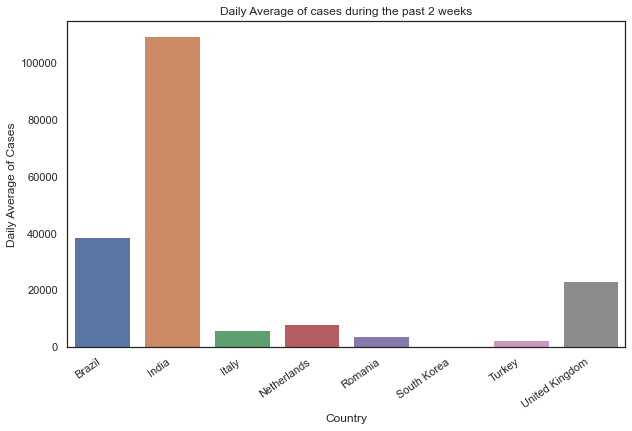

In [29]:
sns.set(
    rc={'figure.figsize':(10,6)}, 
    style="white",
    palette = 'deep',
    color_codes=True
)
sns.barplot( x='Country',
    y='Daily Average of Cases',
    data=covid_countries_dapt_df
)
plt.xticks(rotation = 35 , ha='right')
plt.title('Daily Average of cases during the past 2 weeks')
plt.savefig("daily avg cases")
plt.show()

In [30]:
#2.Putting the population factor into consideration , will the picture look different ?

In [31]:
fig = px.scatter(
    data_frame=covid_countries_dapt_sorted, 
    x="date", 
    y="Cases_per_Million", 
    size="Population_million", 
    color="Country",
    hover_name="Country",
    size_max=60,
    title = "Cumulative data for Cases per Million since past 2 weeks"
)
fig.show()
plt.savefig("Cumulative Cases per million - Past 2 weeks across the 8 countries")

<Figure size 720x432 with 0 Axes>

In this plot , the size of the bubble represents the Population per Million. The bigger the bubble, the higher the Pop.per million
Based on the available data for the past 2 weeks ,its clear that India has the highest Pop. per million followed by Brazil , the no. of cases per million are not significantly increasing there when compared to the countries with lower Pop.per million such as the U.K and Netherlands.

In [32]:
fig = px.scatter(
    data_frame=covid_countries_dapt, 
    x="date", 
    y="Cases_per_Million", 
    color="Country",
    hover_name="Country",
    size_max=60,
    title = "Cumulative data for Cases per Million since past 2 weeks"
)
fig.show()
plt.savefig("Cumulative Cases per million2 - Past 2 weeks across the 8 countries")

<Figure size 720x432 with 0 Axes>

Without the "Population per Million" showing up in the sizes ,would give more clarity on where each country stands with respect to the Cases per million. 

#Which country has had the highest death rate/victims ?

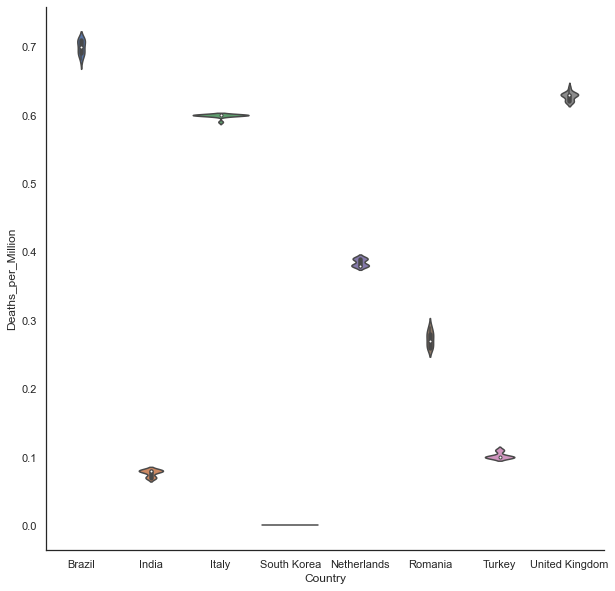

In [33]:
sns.set(
    rc={'figure.figsize':(10,10)}, 
    style="white",
    palette = 'deep',
    color_codes=True
)
sns.violinplot(
    x='Country',
    y='Deaths_per_Million',
    split=True,
    data=covid_countries_dapt
)
sns.despine()
plt.savefig("deaths per million plot")

The highest number of daily cases reported in India can be accounted for the high population density.
But ,Italy though has a lower density has more number of daily cases and higher average of cases than Netherlands with the highest density in this group.
Italy was the epicenter of outbreak in Europe ,and this could also be due to the lack of public awareness ,leaving a "not-prepared " nation to face the pandemic eventually leading to collapse of healthcare facilities.
The death rate was also scary as can be seen from the position and width of the plot.

Impact of Population per Million/Pop.Density on the number of cases

In [34]:
fig = px.scatter(
    data_frame=covid_countries_dapt, 
    x="Population_million", 
    y="Cases_per_Million", 
    size="Density(P/Km²)", 
    color="Country",
    hover_name="Country",
    size_max=60,
    title = "Cases per Million in the Countries"    
)
fig.show()
plt.savefig('Density Vs Cases')

<Figure size 720x720 with 0 Axes>

There's quite an interesting observation here that despite having high Pop.per million and high density, India has a considerable less number of cases than Brazil. Brazil indeed has a lowest figure of density amongst the 8 countries,but this huge surge in cases could be due to the high Pop.per million factor.
South Korea ,which has quite a high population density has so far been successful in handling the pandemic with an effective strategy in place with the lowest cases per million reported.

------------------------------------------STATISTICAL ANALYSIS --------------------------------------------

In [35]:
#Italy was one of the worst affected countries in Europe with a high mortality rate.
#Confidence intervals for the average deaths per million in Italy .

#Extracting data of Italy from March till October
covid_Italy1 = final_data[(final_data['Country'] == 'Italy')]
covid_Italy1['date'] = pd.to_datetime(covid_Italy1['date'])
start_date = '2020-03-01'
end_date = '2020-10-01'
mask = (covid_Italy1['date'] >= start_date) & (covid_Italy1['date'] <= end_date)
covid_Italy1 = covid_Italy1.loc[mask]
covid_Italy1

covid_Italy1_sorted = covid_Italy1.sort_values(['date'])
covid_Italy1_sorted

,date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Population,Density(P/Km²),Population_million,Cases_per_Million,Deaths_per_Million,Recovered_per_Million
21306,2020-03-01,Italy,1694,34.0,0.0,1660.0,1691,34,0,60446035,206,60446.04,0.03,0.00,0.0
21317,2020-03-02,Italy,2036,52.0,0.0,1984.0,0,0,0,60446035,206,60446.04,0.03,0.00,0.0
21328,2020-03-03,Italy,2502,79.0,0.0,2423.0,0,0,0,60446035,206,60446.04,0.04,0.00,0.0
21331,2020-03-04,Italy,3089,107.0,0.0,2982.0,0,0,0,60446035,206,60446.04,0.05,0.00,0.0
21332,2020-03-05,Italy,3858,148.0,0.0,3710.0,769,41,0,60446035,206,60446.04,0.06,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21509,2020-09-27,Italy,309870,35835.0,0.0,274035.0,1766,17,0,60446035,206,60446.04,5.13,0.59,0.0
21510,2020-09-28,Italy,311364,35851.0,0.0,275513.0,1494,16,0,60446035,206,60446.04,5.15,0.59,0.0
21511,2020-09-29,Italy,313011,35875.0,0.0,277136.0,1647,24,0,60446035,206,60446.04,5.18,0.59,0.0
21513,2020-09-30,Italy,314861,35894.0,0.0,278967.0,41949,387,0,60446035,206,60446.04,5.21,0.59,0.0


In [36]:
sample_mean = covid_Italy1_sorted.loc[:,"Deaths_per_Million"].mean()
sample_std = covid_Italy1_sorted.loc[:,"Deaths_per_Million"].std()
sample_mean1 = covid_Italy1_sorted.loc[:,"New deaths"].mean()
sample_mean1

703.5767441860465

In [37]:
#sample size 
n = len(covid_Italy1_sorted)

confidence_lvl = 0.95

z = stats.norm.interval(confidence_lvl)[1]

margin_error = sample_std/np.sqrt(n)
conf = [sample_mean - (z * margin_error) , sample_mean + (z * margin_error)]
conf_int = [round(num, 2) for num in conf]
print('With ' + str(confidence_lvl * 100) + '% confidence, the true mean of the deaths per million in Italy ,lies within the interval:', conf_int)

With 95.0% confidence, the true mean of the deaths per million in Italy ,lies within the interval: [0.44, 0.49]
